In [1]:
import numpy as np
import sys
sys.path.append("..")
from train_test_split import train_test_split
from knn import KNearestNeighbours 
from classification_tree import ClassificationTree
from logistic_regression import SoftmaxRegression
from preprocessing import MinMaxScaler

red_wines = np.genfromtxt("../datasets/wine+quality/winequality-red.csv", delimiter=";",skip_header=1)
print(red_wines)
X_red = red_wines[:, :-1]  # All rows, all but the last column for features
y_red = red_wines[:, -1]   # All rows, only the last column for the target variable

print(X_red[:5])
print(y_red[:5])

[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]
[[7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]
 [7.800e+00 8.800e-01 0.000e+00 2.600e+00 9.800e-02 2.500e+01 6.700e+01
  9.968e-01 3.200e+00 6.800e-01 9.800e+00]
 [7.800e+00 7.600e-01 4.000e-02 2.300e+00 9.200e-02 1.500e+01 5.400e+01
  9.970e-01 3.260e+00 6.500e-01 9.800e+00]
 [1.120e+01 2.800e-01 5.600e-01 1.900e+00 7.500e-02 1.700e+01 6.000e+01
  9.980e-01 3.160e+00 5.800e-01 9.800e+00]
 [7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]]
[5. 5. 5. 6. 5.]


In [7]:
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red, y_red, test_size=0.2, seed=2108)

scaler_redwine = MinMaxScaler()
X_scaled_train_red = scaler_redwine.fit_transform(X_red_train)

knn_red = KNearestNeighbours(5)
tree_red = ClassificationTree()
sm_red = SoftmaxRegression(n_iterations=10000)

In [8]:
knn_red.fit(X_scaled_train_red,y_red_train)
tree_red.fit(X_scaled_train_red,y_red_train)
sm_red.fit(X_scaled_train_red,y_red_train)

In [9]:
scaled_test_x = scaler_redwine.transform(X_red_test)

pred_knn_red = knn_red.predict(scaled_test_x)
pred_tree_red = tree_red.predict(scaled_test_x)
pred_sm_red = sm_red.predict(scaled_test_x)

In [10]:
print(pred_knn_red == y_red_test)
print("KNN Accuracy: ", np.mean(pred_knn_red == y_red_test))
print(pred_tree_red == y_red_test)
print("Tree Accuracy: ", np.mean(pred_tree_red == y_red_test))
print(pred_sm_red == y_red_test)
print("Softmax Accuracy: ", np.mean(pred_sm_red == y_red_test))

[ True False  True  True False  True  True  True False  True  True False
  True  True  True False False  True  True False  True  True  True  True
  True  True  True False  True  True False  True  True  True  True  True
 False False  True  True  True  True False False  True  True False False
 False  True False  True False False  True False  True  True False False
 False  True False  True  True  True False  True  True  True  True  True
  True  True  True False  True False  True False False  True False  True
 False  True False False  True  True False  True False False  True False
 False False False False  True  True False  True False  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True False  True False False  True False  True  True  True
  True False  True  True  True False False  True  True False  True  True
  True False False  True  True False  True  True  True False False  True
 False  True  True  True False False False  True Fa

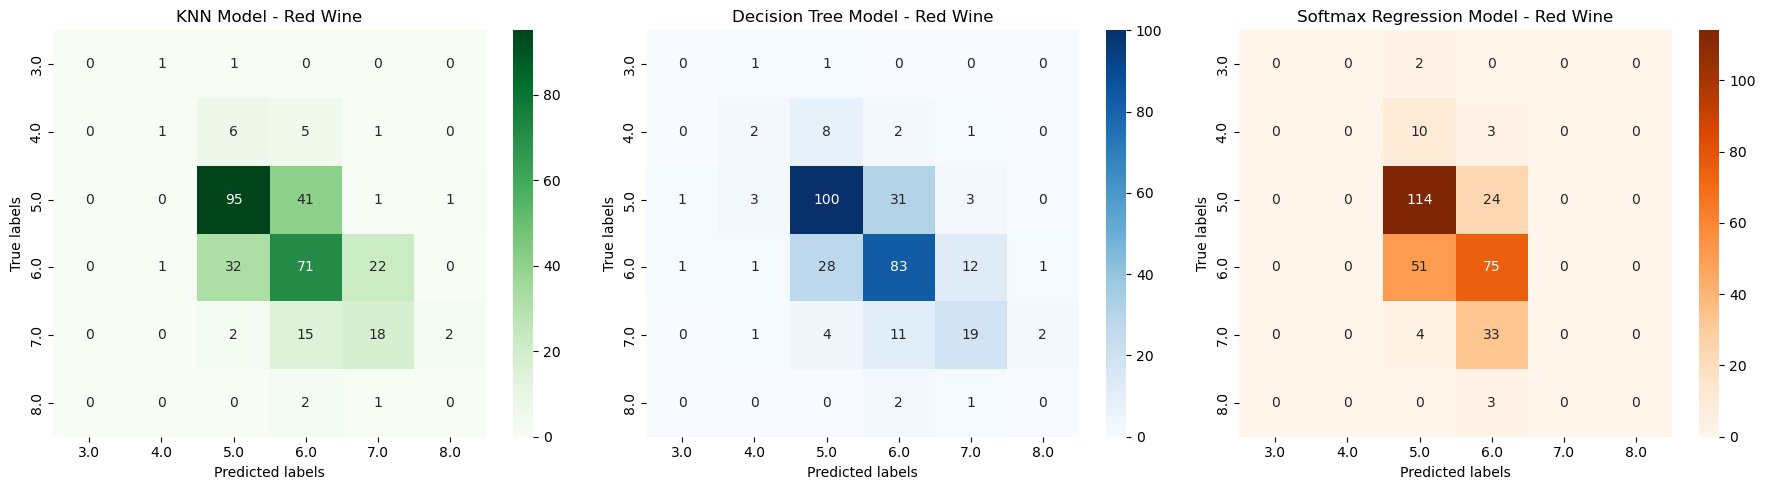

In [11]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Compute confusion matrices for each model
cm_knn_red = confusion_matrix(y_red_test, pred_knn_red)
cm_tree_red = confusion_matrix(y_red_test, pred_tree_red)
cm_sm_red = confusion_matrix(y_red_test, pred_sm_red)

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# Plot confusion matrix for KNN Model
sns.heatmap(cm_knn_red, annot=True, fmt="d", cmap="Greens", ax=axes[0], xticklabels=np.unique(y_red_test), yticklabels=np.unique(y_red_test))
axes[0].set_title('KNN Model - Red Wine')
axes[0].set_xlabel('Predicted labels')
axes[0].set_ylabel('True labels')

# Plot confusion matrix for Decision Tree Model
sns.heatmap(cm_tree_red, annot=True, fmt="d", cmap="Blues", ax=axes[1], xticklabels=np.unique(y_red_test), yticklabels=np.unique(y_red_test))
axes[1].set_title('Decision Tree Model - Red Wine')
axes[1].set_xlabel('Predicted labels')
axes[1].set_ylabel('True labels')

# Plot confusion matrix for Softmax Regression Model
sns.heatmap(cm_sm_red, annot=True, fmt="d", cmap="Oranges", ax=axes[2], xticklabels=np.unique(y_red_test), yticklabels=np.unique(y_red_test))
axes[2].set_title('Softmax Regression Model - Red Wine')
axes[2].set_xlabel('Predicted labels')
axes[2].set_ylabel('True labels')

plt.tight_layout()  # Adjust layout to make room for titles and labels
plt.show()